In [1]:
# Import ....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist, squareform

# VAT algorithm provided for your use
def VAT(R):
    """

    VAT algorithm adapted from matlab version:
    http://www.ece.mtu.edu/~thavens/code/VAT.m

    Args:
        R (n*n double): Dissimilarity data input
        R (n*D double): vector input (R is converted to sq. Euclidean distance)
    Returns:
        RV (n*n double): VAT-reordered dissimilarity data
        C (n int): Connection indexes of MST in [0,n)
        I (n int): Reordered indexes of R, the input data in [0,n)
    """
        
    R = np.array(R)
    N, M = R.shape
    if N != M:
        R = squareform(pdist(R))
        
    J = list(range(0, N))
    
    y = np.max(R, axis=0)
    i = np.argmax(R, axis=0)
    j = np.argmax(y)
    y = np.max(y)


    I = i[j]
    del J[I]

    y = np.min(R[I,J], axis=0)
    j = np.argmin(R[I,J], axis=0)
    
    I = [I, J[j]]
    J = [e for e in J if e != J[j]]
    
    C = [1,1]
    for r in range(2, N-1):   
        y = np.min(R[I,:][:,J], axis=0)
        i = np.argmin(R[I,:][:,J], axis=0)
        j = np.argmin(y)        
        y = np.min(y)      
        I.extend([J[j]])
        J = [e for e in J if e != J[j]]
        C.extend([i[j]])
    
    y = np.min(R[I,:][:,J], axis=0)
    i = np.argmin(R[I,:][:,J], axis=0)
    
    I.extend(J)
    C.extend(i)
    
    RI = list(range(N))
    for idx, val in enumerate(I):
        RI[val] = idx

    RV = R[I,:][:,I]
    
    return RV.tolist(), C, I



In [2]:
#  Begin answering questions.  Please start a new cell for each question.
# First Load the data in...

# Imports
import json
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from pandas.plotting import parallel_coordinates

# Question 1.1
# Read in traffic data frame
traffic = pd.read_csv("traffic.csv")
# Find the shape of the data frame
row, col = traffic.shape

# Print out results
print("***\nQ1.1")
print("Number of traffic survey entries: " + str(row))
print("Number of attributes: " + str(col) + "\n")
# Data types
print(traffic.dtypes)
print("***")




***
Q1.1
Number of traffic survey entries: 60168
Number of attributes: 28

date                      object
road_name                 object
location                  object
suburb                    object
speed_limit                int64
direction                 object
time                      object
vehicle_class_1          float64
vehicle_class_2          float64
vehicle_class_3          float64
vehicle_class_4          float64
vehicle_class_5          float64
vehicle_class_6          float64
vehicle_class_7          float64
vehicle_class_8          float64
vehicle_class_9          float64
vehicle_class_10         float64
vehicle_class_11         float64
vehicle_class_12         float64
vehicle_class_13         float64
motorcycle               float64
bike                     float64
average_speed            float64
85th_percentile_speed    float64
maximum_speed             object
road_segment               int64
road_segment_1           float64
road_segment_2           float64
d

In [3]:
# Question 1.2
print("***\nQ1.2")

# Remove null entries
traffic = traffic[traffic.maximum_speed != "-"]
traffic = traffic[traffic.maximum_speed.notnull()]
row, col = traffic.shape

# Ensure that entries have been successfully removed
print("Number of remaining traffic survey entries: " + str(row))
print("***")

***
Q1.2
Number of remaining traffic survey entries: 41510
***


In [4]:
# Question 1.3
print("***\nQ1.3")

# Covert strings to floats and find median and max values
traffic["maximum_speed"] = pd.to_numeric(traffic["maximum_speed"])
median_class_1 = traffic["vehicle_class_1"].median()
max_speed = traffic["maximum_speed"].max()

# Print results
print("Median value of vehicle_class_1: " + str(median_class_1))
print("Highest value of maximum_speed: " + str(max_speed))
print("***")

***
Q1.3
Median value of vehicle_class_1: 28.0
Highest value of maximum_speed: 159
***


In [5]:
# Question 2.1
print("***\nQ2.1")

# Set new attribute with default value for safety
traffic["street_type"] = '-'

# Open roads.json into dataframe
roads_json = json.load(open('roads.json'))
roads_json = roads_json['data']
roads_df = pd.DataFrame.from_dict(roads_json)

# Copy over road tyoe by comparing seg_id
road_segment = 0
for i, row in enumerate(traffic["road_segment"]):
    last_road_segment = road_segment
    road_segment = traffic.iloc[i][25]
    
    # Improves computation time by checking if the road segemnt is the same as the last one
    # hence doesnt need to be re- located in roads.json
    if road_segment == last_road_segment:
        traffic.iat[i,28] = street_type
    else:
        # Finds the road segment from traffic dataframe in roads_df and copys the road type to traffic
        # datd frame.
        index = roads_df[roads_df[9].astype(int) == int(road_segment)].index.values.astype(int)[0]
        street_type = roads_df[14][index]
        traffic.iat[i,28] = street_type

# Print results
print("The first three rows of traffic DataFrame with the attribute StrType are: ")
print(traffic.head(3))                

***
Q2.1
The first three rows of traffic DataFrame with the attribute StrType are: 
        date      road_name                                    location  \
4  3/09/2015  Bayles Street  Between Fitzgibbon Street and Jageurs Lane   
5  3/09/2015  Bayles Street  Between Fitzgibbon Street and Jageurs Lane   
6  3/09/2015  Bayles Street  Between Fitzgibbon Street and Jageurs Lane   

      suburb  speed_limit direction  time  vehicle_class_1  vehicle_class_2  \
4  Parkville           40         E  4:00              1.0              0.0   
5  Parkville           40         E  5:00              1.0              0.0   
6  Parkville           40         E  6:00              4.0              0.0   

   vehicle_class_3  ...  vehicle_class_13  motorcycle  bike  average_speed  \
4              0.0  ...               0.0         0.0   1.0           18.2   
5              0.0  ...               0.0         0.0   0.0           44.7   
6              0.0  ...               0.0         0.0   0.0     

In [6]:
# Question 2.2
print("***\nQ2.2")
print("The first three rows of traffic DataFrame with the new max_speed_over_limit attribute are: ")

# Create new column based on maximum speeed over limit, it was decided to keep negative results
# as the questin was abigous as to how we should handle this case.
traffic["max_speed_over_limit"] = traffic["maximum_speed"]-traffic["speed_limit"]

#print first 3 rows
print(traffic.head(3))
print("***")

***
Q2.2
The first three rows of traffic DataFrame with the new max_speed_over_limit attribute are: 
        date      road_name                                    location  \
4  3/09/2015  Bayles Street  Between Fitzgibbon Street and Jageurs Lane   
5  3/09/2015  Bayles Street  Between Fitzgibbon Street and Jageurs Lane   
6  3/09/2015  Bayles Street  Between Fitzgibbon Street and Jageurs Lane   

      suburb  speed_limit direction  time  vehicle_class_1  vehicle_class_2  \
4  Parkville           40         E  4:00              1.0              0.0   
5  Parkville           40         E  5:00              1.0              0.0   
6  Parkville           40         E  6:00              4.0              0.0   

   vehicle_class_3  ...  motorcycle  bike  average_speed  \
4              0.0  ...         0.0   1.0           18.2   
5              0.0  ...         0.0   0.0           44.7   
6              0.0  ...         0.0   0.0           27.4   

   85th_percentile_speed  maximum_speed 

In [7]:
# Question 2.3
print("***\nQ2.3")

# Create the arterial data fram from the traffic data frame
arterials = traffic.loc[traffic['street_type'] == "Arterial"]
arterials = arterials.groupby("road_name")
max_speed_roads = arterials["max_speed_over_limit"].max().sort_values(ascending=False)

print("Three Arterial roads with the highest maximum max_speed_over_limit: ")
print(max_speed_roads.head(3))
print("***")

# Question 2.3 comment
text_1 = """Question 2.3 comment) This infomation could be useful to VicRoads to help them identify which roads that they control had the
worst speeding offences commited on them and thus enable them to deploy saftey measures such as speed cameras
and warning signs to reduce the likely hood of speeding and thus injury/death on them."""

print(text_1)


***
Q2.3
Three Arterial roads with the highest maximum max_speed_over_limit: 
road_name
Macaulay Road     94
King Street       71
Spencer Street    46
Name: max_speed_over_limit, dtype: int64
***
Question 2.3 comment) This infomation could be useful to VicRoads to help them identify which roads that they control had the
worst speeding offences commited on them and thus enable them to deploy saftey measures such as speed cameras
and warning signs to reduce the likely hood of speeding and thus injury/death on them.


[Text(0, 0.5, 'Average speed of vehicle (km/h)'), Text(0.5, 0, 'Suburb')]

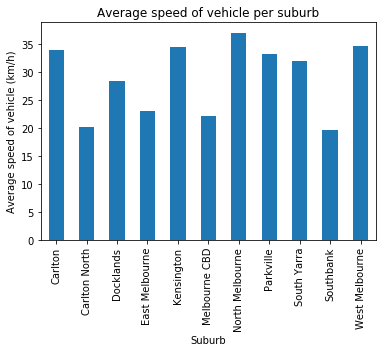

In [8]:
# Question 3.1a
traffic = traffic.replace("CARLTON", "Carlton")

# Create and label plot of average speed per suburb
mean_speed = traffic.groupby("suburb")["average_speed"].mean()
mean_speed_plt = mean_speed.plot.bar()
mean_speed_plt.set_title("Average speed of vehicle per suburb")
mean_speed_plt.set(xlabel="Suburb", ylabel="Average speed of vehicle (km/h)")

Question 3.1 comment) We can observe that outer suburbs tend to have higher mean speeds perhaps due to lower levels of traffic.
Furthermore the box plot of the number of short vehicles shows very interesting results. We can see that the data
has a very high variance and is extremly positivly skewed, pushing large proprtions of the data outside the 4th
quartile


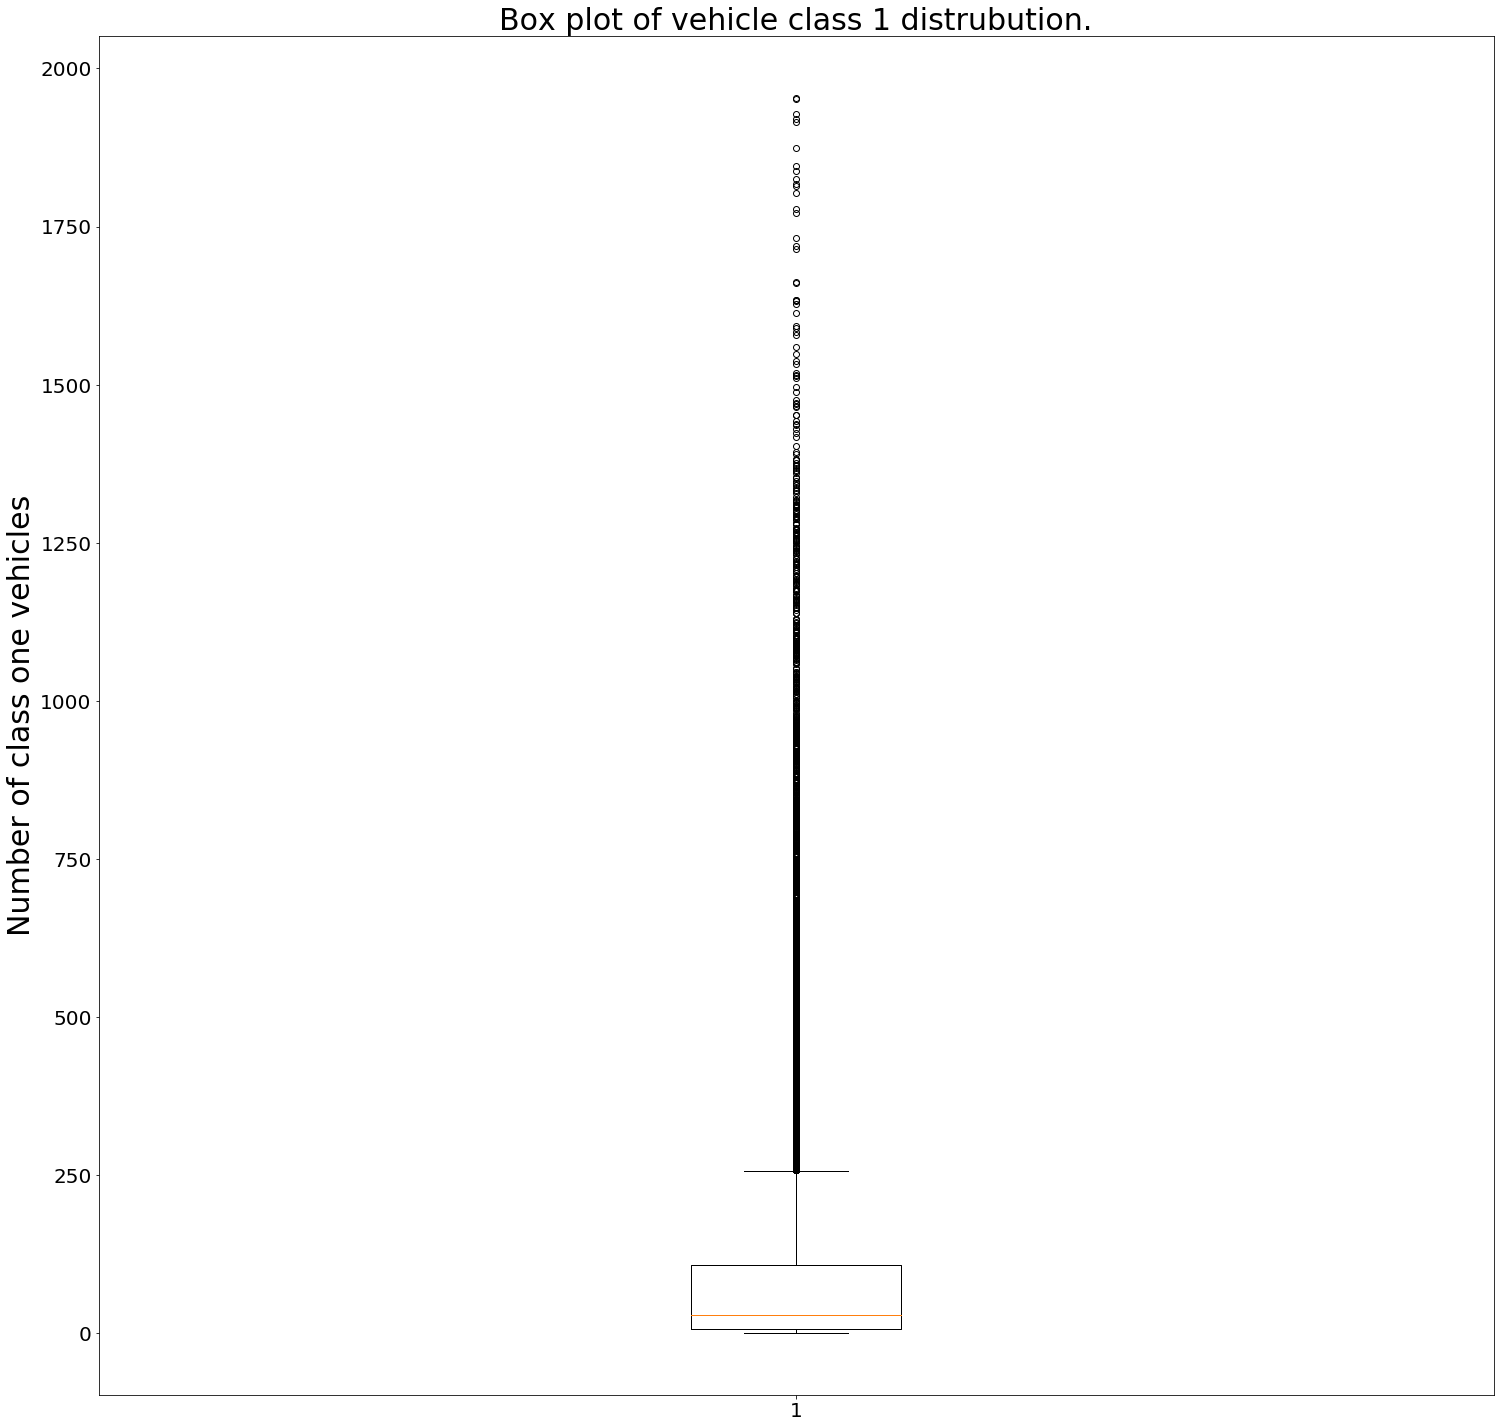

In [9]:
# Question 3.1b
# Box plot short vehicles
short_vehicles = traffic["vehicle_class_1"]
plt.figure(figsize=(25,25))
plt.boxplot(short_vehicles)
plt.title("Box plot of vehicle class 1 distrubution.", fontsize = 30)
plt.ylabel("Number of class one vehicles", fontsize = 30)
plt.tick_params(axis='both', which='major', labelsize=20)

# Question 3.1 comment
text_2 = """Question 3.1 comment) We can observe that outer suburbs tend to have higher mean speeds perhaps due to lower levels of traffic.
Furthermore the box plot of the number of short vehicles shows very interesting results. We can see that the data
has a very high variance and is extremly positivly skewed, pushing large proprtions of the data outside the 4th
quartile"""

print(text_2)

Variance explained by each PC [0.99231843 0.0046645 ]


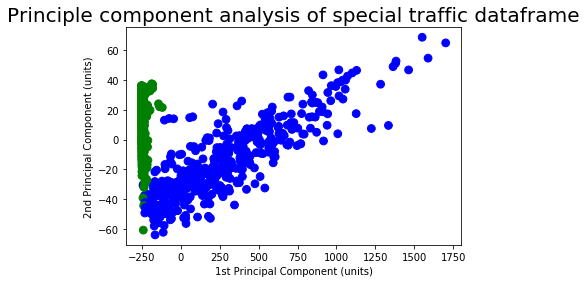

Question 3.2b comment) It appears that the first principle component is a linear combination of 
vehicle class attibutes judging by the scale and the second principle
component appears to be related to speed of vehicle.


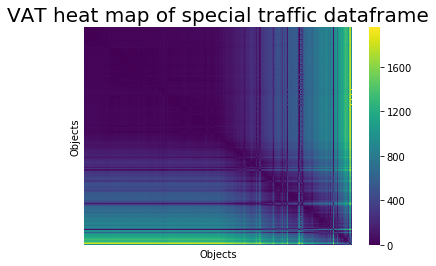

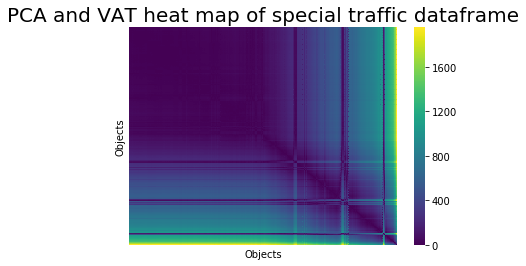

Question 3.2d comment) The two vat plots look similar, hence the principle componets represent the
important parts of the data. Some small clusters have been lost as can be seen in the lower right
corner of the VAT heat maps.


In [10]:
# Question 3.2a
# Create a random sample with seed. (1354)
special_traffic = pd.read_csv("special_traffic.csv").sample(1000, random_state = 1354)
special_traffic.head()
special_traffic_2 = special_traffic.drop(["idx","StrType"], axis=1)

# Perform PCA for 2 components to reduce dimentionality
sklearn_pca = sklearnPCA(n_components=2)
special_traffic_sklearn = sklearn_pca.fit_transform(special_traffic_2)
print("Variance explained by each PC",sklearn_pca.explained_variance_ratio_) 
 
# Use contrasting colours
palette = ['blue','green']
colors=special_traffic.StrType.replace(to_replace=special_traffic.StrType.unique(),value=palette).tolist()

# Plot the coloured scatter plot
plt.scatter(special_traffic_sklearn[:,0],special_traffic_sklearn[:,1],s=60,c=colors)
plt.xlabel('1st Principal Component (units)', fontsize=10)
plt.ylabel('2nd Principal Component (units)', fontsize=10)
plt.title("Principle component analysis of special traffic dataframe", fontsize=20)
plt.show()


# Question 3.2b comment
text_3 = """Question 3.2b comment) It appears that the first principle component is a linear combination of 
vehicle class attibutes judging by the scale and the second principle
component appears to be related to speed of vehicle."""

print(text_3)

# Question 3.2c

# Vat heat map on unaltered dataframe.
RV, C, I = VAT(special_traffic_2)
x=sns.heatmap(RV,cmap='viridis',xticklabels=False,yticklabels=False)
x.set_title("VAT heat map of special traffic dataframe", fontsize=20)
x.set(xlabel='Objects', ylabel='Objects')
plt.show()

# Vat heat map on PCA dataframe.
RV, C, I = VAT(special_traffic_sklearn)
x=sns.heatmap(RV,cmap='viridis',xticklabels=False,yticklabels=False)
x.set(xlabel='Objects', ylabel='Objects')
x.set_title("PCA and VAT heat map of special traffic dataframe", fontsize=20)
plt.show()

# Question 3.2d comment
text_4 = """Question 3.2d comment) The two vat plots look similar, hence the principle componets represent the
important parts of the data. Some small clusters have been lost as can be seen in the lower right
corner of the VAT heat maps."""

print(text_4)

Question 3.3a comment) The elbow plot is hard to interpret as there is no clear elbow however it suggests
about 4 to 5 clusters is appropriate, this aggrees with the VAT heatmap results on the two principle 
components which suggests about 4 clusters.


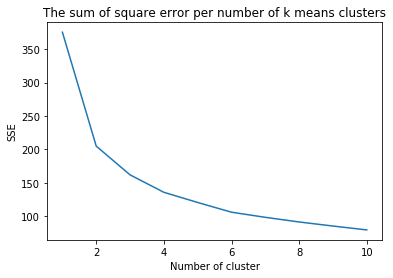

In [11]:
# Question 3.3a
# Normalising the special traffic dataframe
special_traffic_2.head()
cols = special_traffic_2.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(special_traffic_2)
special_traffic_2_norm = pd.DataFrame(np_scaled, columns = cols)
special_traffic_2_norm

# Performing kmeans for 1 to 10 clusters
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(special_traffic_2_norm)
    # Which cluster each row belongs to.
    special_traffic_2_norm["clusters"] = kmeans.labels_
    # Sum of square errors
    sse[k] = kmeans.inertia_
    
# Plot results
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title("The sum of square error per number of k means clusters")

# Question 3.3a comment
text_4 = """Question 3.3a comment) The elbow plot is hard to interpret as there is no clear elbow however it suggests
about 4 to 5 clusters is appropriate, this aggrees with the VAT heatmap results on the two principle 
components which suggests about 4 clusters."""
print(text_4)

0    428
1    352
2    220
Name: clusters, dtype: int64


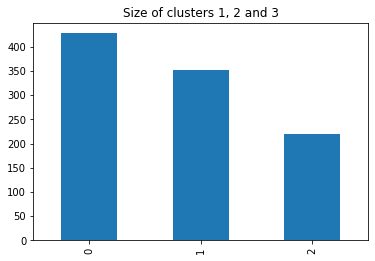

In [12]:
# Question 3.3b
# Performing kmeans on k=3
k = 3
kmeans = KMeans(n_clusters=k, max_iter=1000).fit(special_traffic_2_norm)

# Plotting a bar plot by assigning each row to a cluster and summing them up
special_traffic_2_norm["clusters"] = kmeans.labels_
special_traffic_2_norm.head(10)
clusters = special_traffic_2_norm["clusters"].value_counts().sort_index()
clusters_plt = clusters.plot.bar()
clusters_plt.set_title("Size of clusters 1, 2 and 3")
print(clusters)

Question 3.3c) One method of visualising the data in order to distinugish between road types 
would be a normalised parrallel co-ordinated graph, to determine any trends bewtween Arterial and Council Minor roads.


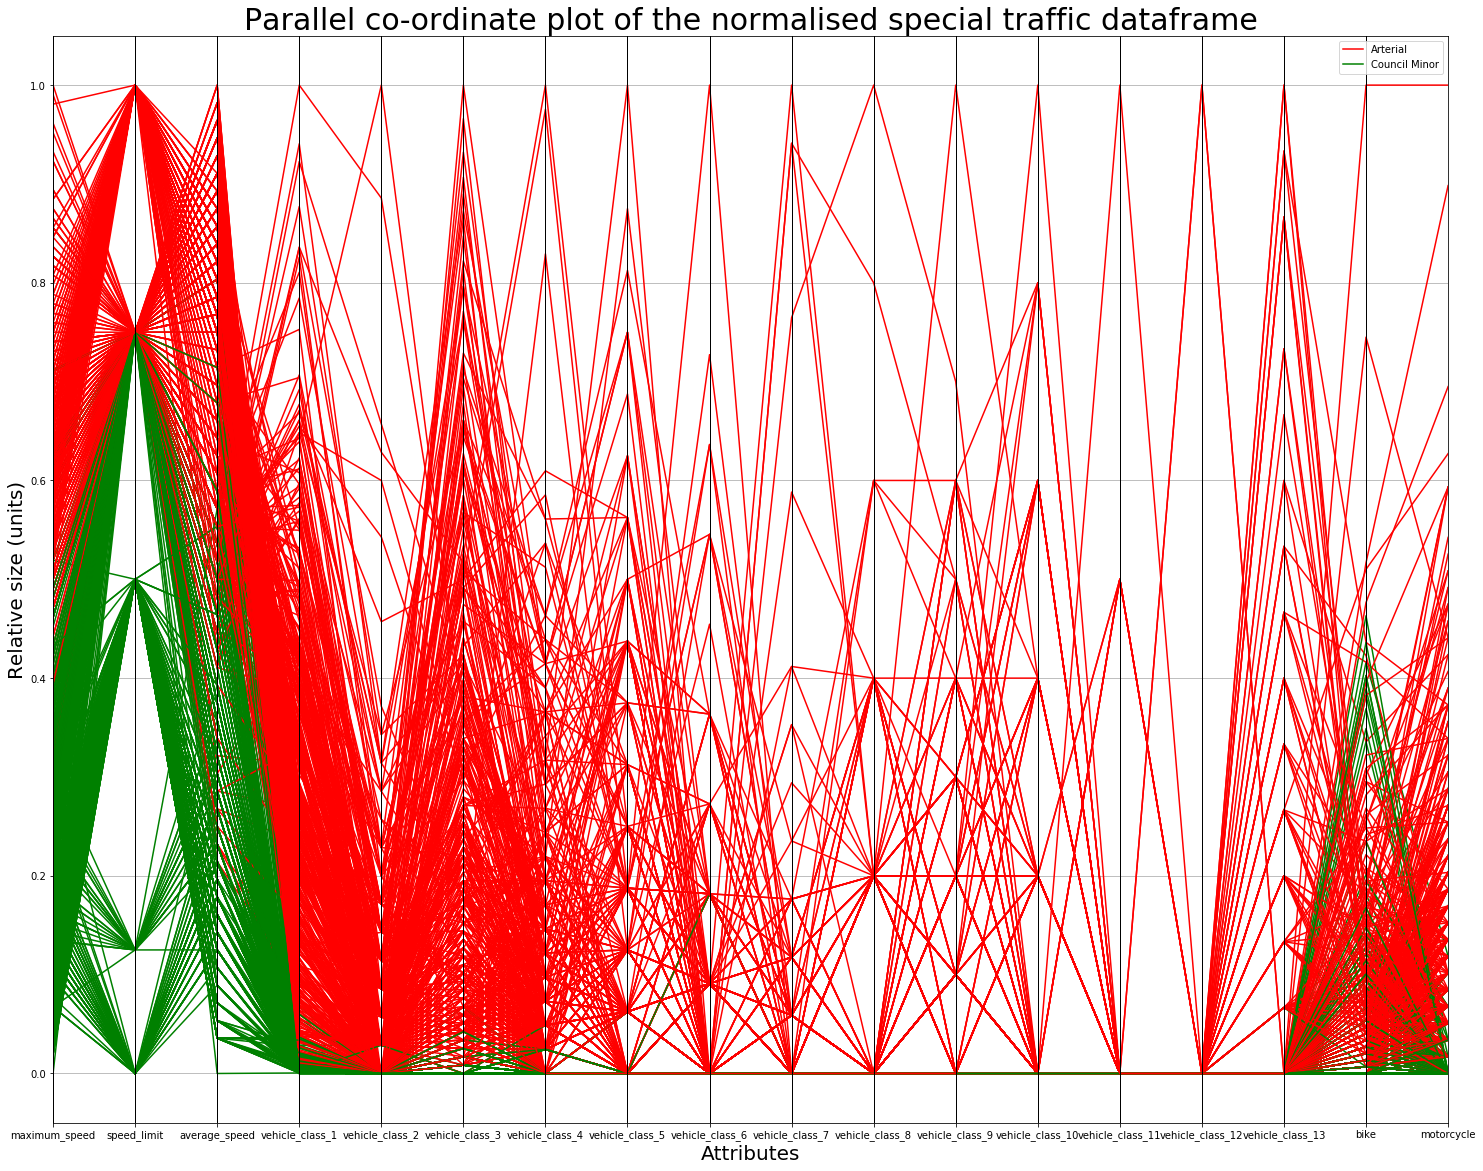

Question 3.3d) Here we can see a great seperation between the two road types, attibutes relating to speed
are much lower on council minor roads as expected. Attibutes relating to number of cars shows that traffic through 
Arterial Roads is much greater with a lot of vehicle classes having zero traffic for some of the bigger vehicles,
althought the reverse is true for bikes. This tells us our model effecitivly groups data based on 
street type.


In [13]:
# Question 3.3c comment
text_5 = """Question 3.3c) One method of visualising the data in order to distinugish between road types 
would be a normalised parrallel co-ordinated graph, to determine any trends bewtween Arterial and Council Minor roads."""
print(text_5)

# Question 3.3d
# Reset index
special_traffic_2_norm.index = special_traffic.index
special_traffic_2_norm["StrType"] = special_traffic["StrType"]

# Plot the Parallel coordinates
fig = plt.figure(figsize=(25, 20))
parallel_coordinates(special_traffic_2_norm.drop(["clusters"], axis = 1), "StrType", color = ("red", "green"))
plt.xlabel('Attributes', fontsize=20)
plt.ylabel('Relative size (units)', fontsize=20)
plt.title("Parallel co-ordinate plot of the normalised special traffic dataframe", fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

# Question answer
text_6 = """Question 3.3d) Here we can see a great seperation between the two road types, attibutes relating to speed
are much lower on council minor roads as expected. Attibutes relating to number of cars shows that traffic through 
Arterial Roads is much greater with a lot of vehicle classes having zero traffic for some of the bigger vehicles,
althought the reverse is true for bikes. This tells us our model effecitivly groups data based on 
street type."""

print(text_6)